In [7]:
import numpy as np
import sys
from scipy.linalg import expm
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from IPython.display import display
from single_hopping import *
from double_hopping import *
from qiskit import transpile
import matplotlib.pyplot as plt


In [2]:
i = 0
j = 1
k = 3
m = 5
N = 7
t = 1
ops = FermionicOp({"+_" + str(i)+" +_"+str(j)+ " -_" + str(k)+" -_"+str(m) : t,\
                    "+_" + str(m)+" +_"+str(k)+ " -_" + str(j)+" -_"+str(i):-t}, num_spin_orbitals=N)
mapper = JordanWignerMapper()
jw_op = mapper.map(ops)
jw_op = qi.Operator(jw_op).to_matrix()
jw_op = np.array(jw_op)

H = create_double_hopping_fermionic_operator(i, j, k, m, N)
print(ops)
eigH = np.linalg.eig(H)[0]
eigJW = np.linalg.eig(jw_op)[0]
eigH = np.sort(1j*eigH)
eigJW = np.sort(1j*eigJW)
print(f"i = {i}, j = {j}, k = {k}, m = {m}, N = {N}")
print(f"The norm of the eigenvalue of qubit matrix is {np.linalg.norm(eigH)}")
print(f"The norm of the eigenvalue of the JW transformation from Qiskit is {np.linalg.norm(eigJW)}")
print(f"The difference between two eigenvalue vector is {np.sum(abs(eigH - eigJW))}")

NameError: name 'create_double_hopping_fermionic_operator' is not defined

In [ ]:
def create_double_hopping_qubit_exponent(i, j, k, m, t, N, gate_sets):
    # This is a test function
    y = np.array([[0, -1j], [1j, 0]])
    x = np.array([[0, 1], [1, 0]])
    z = np.array([[1, 0], [0, -1]])
    I = np.eye(2)
    M = 1
    for a in range(N):
        if a < i:
            M = np.kron(M, I)
        elif a == i:
            if gate_sets[0] == "X":
                M = np.kron(M, x)
            else:
                M = np.kron(M, y)
        elif a < j:
            M = np.kron(M, z)
        elif a == j:
            if gate_sets[1] == "X":
                M = np.kron(M, x)
            else:
                M = np.kron(M, y)
        elif a < k:
            M = np.kron(M, I)
        elif a == k:
            if gate_sets[2] == "X":
                M = np.kron(M, x)
            else:
                M = np.kron(M, y)
        elif a < m:
            M = np.kron(M, z)
        elif a == m:
            if gate_sets[3] == "X":
                M = np.kron(M, x)
            else:
                M = np.kron(M, y)
        else:
            M = np.kron(M, I)
    M = expm(-1j*t*M/2)
    return M

In [ ]:
N = 7
i = 0
j = 1
k = 4
m = 6
t = 1
H = create_double_hopping_fermionic_operator(i, j, k, m, N)
M = create_qubit_double_hopping_matrix(i,j,k,m,N)
# print(H)
print(f"The difference between the fermionic operator and the qubit operator is {np.sum(abs(H-M))}")

The difference between the fermionic operator and the qubit operator is 0.0


In [ ]:
N = 10
i = 0
j = 3
k = 6
m = 9
t = 10
qc = QuantumCircuit(N)
gate_set = ["Y", "X", "Y", "Y"]
create_circuit_components(qc,i,j,k,m,t,N, gate_set)
M = create_double_hopping_qubit_exponent(i, j, k, m, t, N, gate_set)
# print(M)
m = qi.Operator(qc).to_matrix()
m = np.array(m)
print(np.sum(abs(m-M)))

4.547473508864641e-13


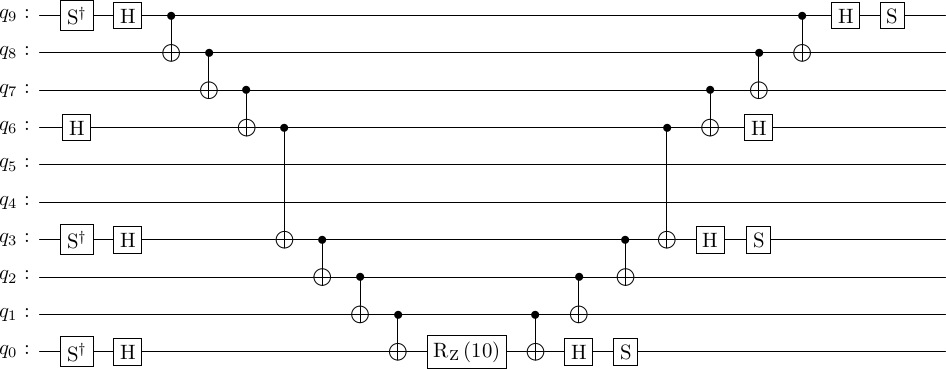

In [ ]:
display(qc.draw("latex", reverse_bits=True))

In [ ]:
N = 5
i = 0
j = 1
k = 3
m = 4
t = 1
qc = create_double_hopping_circuit(i,j,k,m,t,N)
M = qi.Operator(qc).to_matrix()
M = np.array(M)
H = create_double_hopping_fermionic_operator(i, j, k, m, N)
expH = expm(t*H)
# print(expH)
print(np.sum(M-expH))

(-1.6986412276764895e-13+0j)


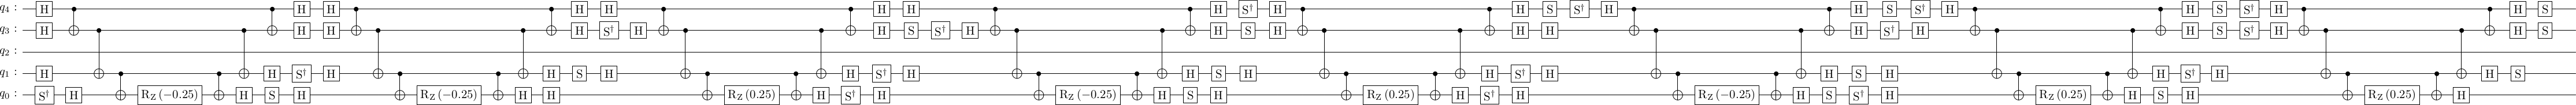

In [ ]:
display(qc.draw("latex", reverse_bits=True))

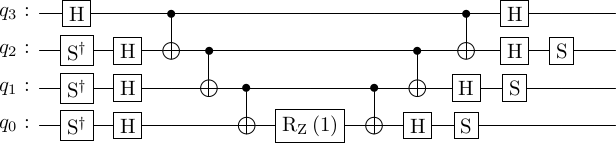

In [ ]:
display(qc.draw("latex", reverse_bits=True))

In [23]:
experiment = 5
t = 1
N_lst = np.arange(2,7)
total_gate = np.zeros([experiment, np.size(N_lst)])
total_gate_H = np.zeros([experiment, np.size(N_lst)])
for a in range(np.size(N_lst)):
    N = N_lst[a]
    for k in range(experiment):
        i = np.random.randint(0, N-1)
        j = np.random.randint(i+1, N)
        H = create_single_hopping_qubit_exponent(N, i, j, t)
        qc = construct_circuit(i,j,N,t)
        qc_dict = qc.count_ops()
        basis = ['rx', 'ry', 'rz','cx','h','cz','crx']
        qcH = QuantumCircuit(N)
        qcH.unitary(H, range(0,N))
        qcH = transpile(qcH, basis_gates = basis, optimization_level=0)
        qcH_dict = qcH.count_ops()
        # print(f"I am at {k}, {a}")
        # print(qc_dict.values())
        # print(sum(qc_dict.values()))
        total_gate[k, a] = sum(qc_dict.values())
        total_gate_H[k, a] = sum(qcH_dict.values())
    print(N)


2
3
4
5
6


[[18. 22. 22. 22. 18.]
 [18. 18. 22. 26. 22.]
 [18. 18. 22. 18. 18.]
 [18. 18. 22. 18. 22.]
 [18. 18. 26. 30. 22.]]


Text(0, 0.5, 'Total number of gates')

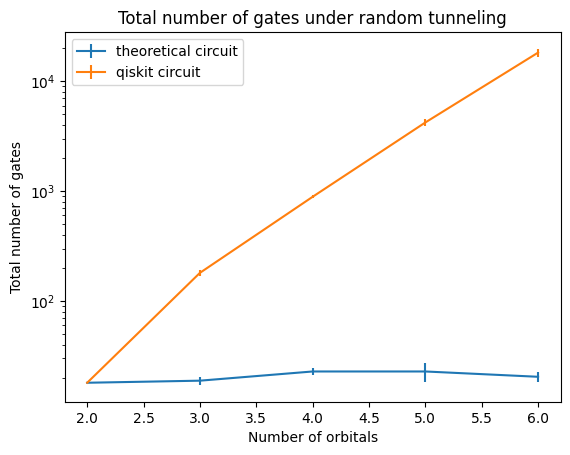

In [26]:
mean_gate = np.mean(total_gate, axis=0)
mean_gate_H = np.mean(total_gate_H, axis=0)
sd_gate = np.sqrt(np.var(total_gate, axis=0))
sdH_gate = np.sqrt(np.var(total_gate_H, axis=0))
plt.errorbar(N_lst, mean_gate, yerr=sd_gate)
plt.errorbar(N_lst, mean_gate_H,yerr=sdH_gate)
plt.yscale("log")
print(total_gate)
plt.legend(["theoretical circuit", "qiskit circuit"])
plt.title("Total number of gates under random tunneling")
plt.xlabel("Number of orbitals")
plt.ylabel("Total number of gates")